In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<h1>Feature Engineering and data Cleaning<h1>

In [6]:
df1 = df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis=1 )

In [7]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df1.rename( columns={'v1':'target' , 'v2':'sms'}, inplace=True)

In [9]:
#checking null values
df1.isnull().sum()

target    0
sms       0
dtype: int64

In [10]:
df1.target.unique()

array(['ham', 'spam'], dtype=object)

In [11]:
#encoding target data
df1['target_encoded'] = df1['target'].apply(lambda x: 0 if x=='ham' else 1)

In [12]:
df1.head(20)

,target,sms,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [13]:
df2 = df1.drop('target' , axis=1 )

In [14]:
df2.head()

,sms,target_encoded
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
df2.shape

(5572, 2)

In [16]:
df2['sms'].head(20)

0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
5     FreeMsg Hey there darling it's been 3 week's n...
6     Even my brother is not like to speak with me. ...
7     As per your request 'Melle Melle (Oru Minnamin...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
10    I'm gonna be home soon and i don't want to tal...
11    SIX chances to win CASH! From 100 to 20,000 po...
12    URGENT! You have won a 1 week FREE membership ...
13    I've been searching for the right words to tha...
14                  I HAVE A DATE ON SUNDAY WITH WILL!!
15    XXXMobileMovieClub: To use your credit, click ...
16                           Oh k...i'm watching here:)
17    Eh u remember how 2 spell his name... Yes 

<h1>Data visualisation<h1>


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Percentage')

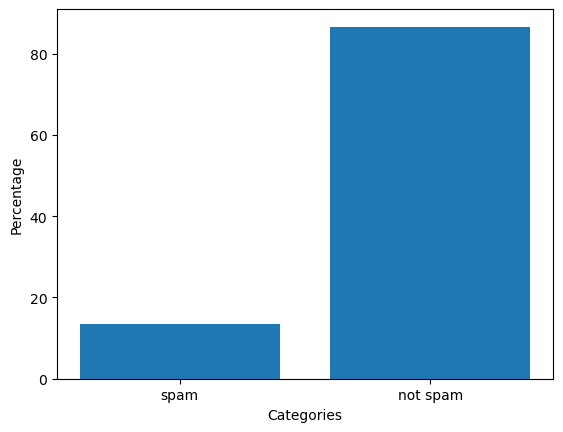

In [18]:
#we can see here that there is imbalanced target distribution
plt.bar(['spam' , 'not spam'] , [(len(df2[df2['target_encoded']==1])/len(df2['target_encoded']))*100 ,(len(df2[df2['target_encoded']==0])/len(df2['target_encoded']))*100 ])
plt.xlabel('Categories')
plt.ylabel('Percentage')

In [19]:
#sms data cleaning
import re
punctuation_pattern = r'[.!?;:"\-\(\)\[\]{}]'
def text_cleaning(text_data):
    text_data = text_data.lower()
    text_data = re.sub(r'\d+', '', text_data)
    text_data = re.sub(punctuation_pattern, ' ', text_data)
    return text_data

In [20]:
df3 = df2.copy()
df3['cleaned_sms_text'] = df3['sms'].apply(lambda x:text_cleaning(x))

In [21]:
df3.head(100)

,sms,target_encoded,cleaned_sms_text
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point, crazy available only ..."
1,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah i don't think he goes to usf, he lives aro..."
...,...,...,...
95,Your free ringtone is waiting to be collected....,1,your free ringtone is waiting to be collected ...
96,Watching telugu movie..wat abt u?,0,watching telugu movie wat abt u
97,i see. When we finish we have loads of loans t...,0,i see when we finish we have loads of loans t...
98,Hi. Wk been ok - on hols now! Yes on for a bit...,0,hi wk been ok on hols now yes on for a bit...


In [22]:
df4 = df3.drop(columns={'sms'})
df4.head()

,target_encoded,cleaned_sms_text
0,0,"go until jurong point, crazy available only ..."
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,"nah i don't think he goes to usf, he lives aro..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import ShuffleSplit

In [24]:
#using tf idf to encode sms data
vector = TfidfVectorizer()
tfidf_matrix = vector.fit_transform(df4['cleaned_sms_text'])
Y = df4['target_encoded']

<h1>Model building and hyper param Tuning<h1>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score 
#hyper param tuning and getting f1 score due to imbalanced target data
def hyper_param_tuning(x,y):
    models={
        'SVM':{
            'model':svm.SVC(),
            'params':{
                'C':[1,10,20], 
                'kernel': ['linear', 'rbf'],
            }
        },
        'Multinomial_NB':{
            'model':MultinomialNB(),
            'params':{
                'alpha':[1.0, 2.0, 5.0]
            }
        },

    
        'Logistic_regression':{
            'model':LogisticRegression(max_iter=1000),
            'params':{
                'C':[1,5,10]
            }
        },

        'Random_Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 20,50],
                'max_depth': [None, 10],
                
            }
        }
    }
    
    scores = []
    f1_scorer = make_scorer(f1_score)
    
    cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state=0)
    for algo , params in models.items():
        grid_cv = GridSearchCV(params['model'],params['params'] ,scoring=f1_scorer, cv=cv , return_train_score=False )
        grid_cv.fit(x,y)
        scores.append({
            'model_name': algo,
            'best_f1_score': grid_cv.best_score_,
            'best_params': grid_cv.best_params_
            
        })
    
    
    scores_df = pd.DataFrame(scores,columns=['model_name','best_f1_score','best_params'])    
    return scores_df    

In [26]:
hyper_param_tuning(tfidf_matrix,df4['target_encoded'])

,model_name,best_f1_score,best_params
0,SVM,0.933372,"{'C': 1, 'kernel': 'linear'}"
1,Multinomial_NB,0.814164,{'alpha': 1.0}
2,Logistic_regression,0.921228,{'C': 10}
3,Random_Forest,0.896103,"{'max_depth': None, 'n_estimators': 50}"


In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(tfidf_matrix,df4['target_encoded'] , test_size=0.25 , random_state=10 )
model = svm.SVC(C=1 , kernel='linear')
model.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

<h1>Model Evaluation<h1>

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
Y_pred = model.predict(X_test)
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))

[[1197    4]
 [  19  173]]


In [29]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1201
           1       0.98      0.90      0.94       192

    accuracy                           0.98      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.98      0.98      0.98      1393


In [30]:
#custom prediction function
def predict_spam(sms):
    sms_cleaned = text_cleaning(sms)
    sms_array =  [sms_cleaned]
    sms_tf_idf_=vector.transform(sms_array)
    is_spam=model.predict(sms_tf_idf_)
    
    return "This email is spam" if is_spam else "This email isn't spam"
    

In [31]:
predict_spam("Call the number  to win a big prize ! ")

'This email is spam'

In [32]:
predict_spam("Call me later")

"This email isn't spam"